# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ferdian Sakti
- **Email:** ferdian@smkdb1jombang.sch.id
- **ID Dicoding:** ferdian_sakti

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu, kelembapan, dan kecepatan angin terhadap jumlah penyewaan sepeda?
- Apakah ada musim tertentu di mana permintaan sepeda lebih tinggi atau lebih rendah?
- Bagaimana pola penyewaan sepeda bervariasi antara pengguna casual dan registered?
- Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [353]:
# Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [354]:
# Import dataset
df_hour = pd.read_csv('/content/sample_data/hour.csv')

In [355]:
# View 5 top rows a dataset
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [356]:
# Check a number a row and column in dataset
df_hour.shape

(17379, 17)

**Insight:**
- Dataset berupa file csv dengan nama file hour.csv untuk dianalisis.
- Dataset memiliki 17.379 baris dan 17 kolom.

### Assessing Data

In [357]:
# Get overview about dataset
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [358]:
# Identify and handle missing value
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [359]:
# Identify and handle duplicates value on dataset
df_hour.duplicated().sum()

0

**Insight:**
- Tidak terdapat missing value dan duplikat value pada dataset yang diimpor.
- Dataset memiliki 4 kolom bertipe float64, 12 kolom bertipe int64, dan
1 kolom bertipe object, yang biasanya berisi teks atau kategori.

### Cleaning Data

In [360]:
# Delete unnecessary columns such as instant and dteday (instant column contains sequence number and dteday column contains calendar)
df_hour.drop(['instant', 'dteday'], axis=1, inplace=True)

In [361]:
# Change data type from integer to categorical in the variabel 'season' refers to readme file
season_string = {1: 'winter',2: 'spring',3: 'summer',4: 'fall'}
df_hour['season'] = df_hour['season'].map(season_string)
df_hour['season'].head()

,season
0,winter
1,winter
2,winter
3,winter
4,winter


In [362]:
# Change data type from integer to categorical for variabel 'mnth'
mnth_string = {1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'}
df_hour['mnth'] = df_hour['mnth'].map(mnth_string)
df_hour['mnth'].head()

,mnth
0,january
1,january
2,january
3,january
4,january


In [363]:
# Change data type from integer to categorical for vaiable 'weekday'
weekday_string = {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}
df_hour['weekday'] = df_hour['weekday'].map(weekday_string)
df_hour['weekday'].head()

,weekday
0,saturday
1,saturday
2,saturday
3,saturday
4,saturday


In [364]:
# Normalisasi sesuai dengan README
df_hour['temp'] = df_hour['temp'] / 41
df_hour['atemp'] = df_hour['atemp'] / 50
df_hour['hum'] = df_hour['hum'] / 100
df_hour['windspeed'] = df_hour['windspeed'] / 67

In [365]:
# Data Binning, categorizing continuous data into secret bins to simplify anaysis
# Define bin edges and labels for temperature category (Cold, Mild, and Hot)
temp_bins = np.linspace(df_hour['temp'].min(), df_hour['temp'].max(), 4)
temp_labels = ['cold', 'mild', 'hot']
df_hour['temp_binned']=pd.cut(df_hour['temp'],bins=temp_bins,labels=temp_labels)

In [366]:
# Define bin edges and labels for humidity (Low, Medium, and High)
hum_bins = np.linspace(df_hour['hum'].min(), df_hour['hum'].max(), 4)
hum_labels = ['low', 'medium', 'high']
df_hour['hum_binned']=pd.cut(df_hour['hum'],bins=hum_bins,labels=hum_labels)


In [367]:
# Define bin edges and labels for windspeed (Calm, Breezy, and Windy)
wind_bins = np.linspace(df_hour['windspeed'].min(), df_hour['windspeed'].max(), 4)
wind_labels = ['Calm', 'Breezy', 'Windy']
df_hour['wind_binned']=pd.cut(df_hour['windspeed'],bins=wind_bins,labels=wind_labels)

In [368]:
# Define bin edges and labels for hour (Early Morning, Morning, Afternoon, and Evening)
hour_bins = [0, 6, 12, 18, 24]
hour_labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening']
df_hour['hour_binned']=pd.cut(df_hour['hr'],bins=hour_bins,labels=hour_labels,right=False)

In [369]:
# Define bin edges and labels for count of rentals
cnt_bins = np.linspace(df_hour['cnt'].min(), df_hour['cnt'].max(), 4)
cnt_labels = ['Low', 'Medium', 'High']
df_hour['cnt_binned'] = pd.cut(df_hour['cnt'],bins=cnt_bins,labels=cnt_labels)

**Insight:**
- Mengubah data integer ke kategorikal pada variabel season sesuai dengan file readme.
- Melakukan binning (temp_binned, hum_binned, wind_binned, hour_binned, cnt_binned) membantu dalam eksplorasi dan pemodelan dengan mengubah variabel kontinu menjadi kategori.

## Exploratory Data Analysis (EDA)

### Explore ...

In [370]:
# Identify basic statistics for continous variables.
df_hour[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


In [371]:
# Value count for categorical variabkes
categorical_columns = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'temp_binned', 'wind_binned', 'hum_binned', 'hour_binned', 'cnt_binned']
value_counts_dict = {}
for column in categorical_columns:
  value_counts_dict[column] = df_hour[column].value_counts()
for column, value_counts in value_counts_dict.items():
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for season:
season
summer    4496
spring    4409
winter    4242
fall      4232
Name: count, dtype: int64

Value counts for yr:
yr
1    8734
0    8645
Name: count, dtype: int64

Value counts for mnth:
mnth
may          1488
july         1488
december     1483
august       1475
march        1473
october      1451
june         1440
april        1437
september    1437
november     1437
january      1429
february     1341
Name: count, dtype: int64

Value counts for weekday:
weekday
saturday     2512
sunday       2502
friday       2487
monday       2479
wednesday    2475
thursday     2471
tuesday      2453
Name: count, dtype: int64

Value counts for weathersit:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

Value counts for temp_binned:
temp_binned
mild    8885
cold    4753
hot     3724
Name: count, dtype: int64

Value counts for wind_binned:
wind_binned
Calm      10940
Breezy     4152
Windy       107
Name: count, dtype: int64

Value counts for

In [372]:
# Mode for categorical variables
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit', 'temp_binned', 'wind_binned', 'hum_binned', 'hour_binned', 'cnt_binned']
mode_values = df_hour[categorical_columns].mode().iloc[0]
mode_values

,0
season,summer
yr,1.0
mnth,july
hr,16
weekday,saturday
weathersit,1.0
temp_binned,mild
wind_binned,Calm
hum_binned,medium
hour_binned,Afternoon


In [373]:
# Group by season and calculate the sum of 'casual' and 'registered'
seasonal_data = df_hour.groupby('season')[['casual', 'registered']].sum().reset_index()

In [374]:
# Calculate the total riders per season
seasonal_data['total_riders'] = seasonal_data['casual'] + seasonal_data['registered']

In [375]:
# Calculate the percentage of casual and registered riders per season
seasonal_data['casual_percentage'] = (seasonal_data['casual'] / seasonal_data['total_riders']) * 100
seasonal_data['registered_percentage'] = (seasonal_data['registered'] / seasonal_data['total_riders']) * 100

In [376]:
# Display the result
print(seasonal_data[['season','casual_percentage','registered_percentage']])

   season  casual_percentage  registered_percentage
0    fall          15.420627              84.579373
1  spring          22.155937              77.844063
2  summer          21.306646              78.693354
3  winter          12.861410              87.138590


In [377]:
# Group by month and calculate the sum of 'casual' and 'registered'
monthly_data = df_hour.groupby('mnth')[['casual', 'registered']].sum().reset_index()

In [378]:
# Calculate the total riders per month
monthly_data['total_riders'] = monthly_data['casual'] + monthly_data['registered']

In [379]:
# Calculate the percentage of casual and registered riders per month
monthly_data['casual_percentage'] = (monthly_data['casual'] / monthly_data['total_riders']) * 100
monthly_data['registered_percentage'] = (monthly_data['registered'] / monthly_data['total_riders']) * 100

In [380]:
# Display the result
print(monthly_data[['mnth','casual_percentage','registered_percentage']])

         mnth  casual_percentage  registered_percentage
0       april          22.595078              77.404922
1      august          20.512594              79.487406
2    december          10.279289              89.720711
3    february           9.886225              90.113775
4     january           8.924429              91.075571
5        july          22.657618              77.342382
6        june          21.339023              78.660977
7       march          19.414643              80.585357
8         may          22.697672              77.302328
9    november          14.363637              85.636363
10    october          18.538740              81.461260
11  september          20.325095              79.674905


In [381]:
# Group by weekday and calculate the average for 'casual' and 'registered'
df_hour.groupby('weekday')[['casual', 'registered']].mean().reset_index()

,weekday,casual,registered
0,friday,31.458786,164.677121
1,monday,28.553449,155.191206
2,saturday,61.246815,128.962978
3,sunday,56.163469,121.305356
4,thursday,24.872521,171.564144
5,tuesday,23.580514,167.658377
6,wednesday,23.159192,167.971313


In [382]:
# Group by hour and calculate the average for 'casual' and 'registered'
df_hour.groupby('hour_binned')[['cnt', 'casual', 'registered']].mean().reset_index()

<ipython-input-382-1667377a1b9d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby('hour_binned')[['cnt', 'casual', 'registered']].mean().reset_index()


,hour_binned,cnt,casual,registered
0,Early Morning,24.908559,4.507717,20.400842
1,Morning,208.100688,28.978899,179.121789
2,Afternoon,295.483886,73.184000,222.299886
3,Evening,225.757555,35.305403,190.452152


**Insight:**
- Persentase pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna kasual (casual) di setiap musim.
- Pengguna sepeda paling banyak menyewa pada jam 12 - 18 (afternoon), baik pengguna biasa atau pengguna yang sudah terdaftar dibuktikan dengan tabel rata-rata waktu penyewa.

### Correlation

In [383]:
# Select only numeric columns for correlation analysis
numeric_columns = ['temp','atemp','hum','windspeed','casual','registered','cnt']
correlation_matrix = df_hour[numeric_columns].corr()

In [384]:
# Display the correlation matrix
print(correlation_matrix)

                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.987672 -0.069881  -0.023125  0.459616    0.335361   
atemp       0.987672  1.000000 -0.051918  -0.062336  0.454080    0.332559   
hum        -0.069881 -0.051918  1.000000  -0.290105 -0.347028   -0.273933   
windspeed  -0.023125 -0.062336 -0.290105   1.000000  0.090287    0.082321   
casual      0.459616  0.454080 -0.347028   0.090287  1.000000    0.506618   
registered  0.335361  0.332559 -0.273933   0.082321  0.506618    1.000000   
cnt         0.404772  0.400929 -0.322911   0.093234  0.694564    0.972151   

                 cnt  
temp        0.404772  
atemp       0.400929  
hum        -0.322911  
windspeed   0.093234  
casual      0.694564  
registered  0.972151  
cnt         1.000000  


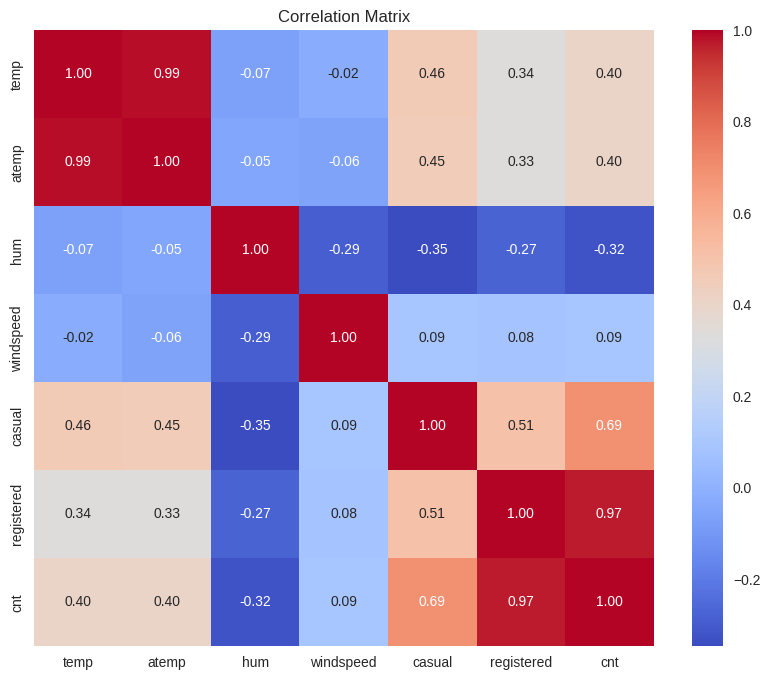

In [385]:
# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [386]:
# Select the relevant numerical columns including 'cnt'
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = df_hour[numerical_columns].corr()

In [387]:
# Extract the correlations of 'cnt' with the other variables
rider_correlations = correlation_matrix.loc[['cnt','casual', 'registered'],['temp','atemp', 'hum', 'windspeed']]

In [388]:
# Display the correlation matrix
print(rider_correlations)

                temp     atemp       hum  windspeed
cnt         0.404772  0.400929 -0.322911   0.093234
casual      0.459616  0.454080 -0.347028   0.090287
registered  0.335361  0.332559 -0.273933   0.082321


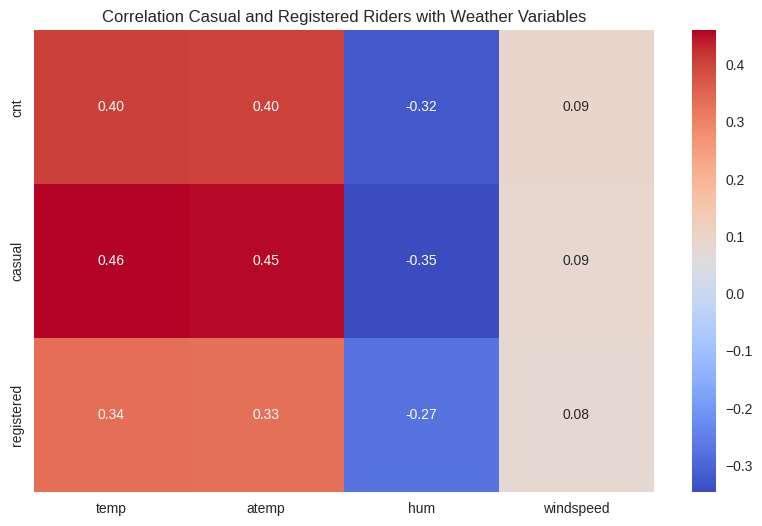

In [389]:
# Generate a heatmap to visualize the correlation matrix for 'casual' and 'registered'
plt.figure(figsize=(10, 6))
sns.heatmap(rider_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Casual and Registered Riders with Weather Variables')
plt.show()

**Insight:**
- Dari heatmap correlation matrix diperoleh hasil bahwa faktor cuaca seperti suhu (temp) berpengaruh terhadap penyewaan sepeda, tetapi faktor kelembaban (hum) cenderung menurunkan penyewaan.
- Dan dari heatmap korelasi registered and casual riders with weather variabel diperoleh hasil bahwasannya cuaca lebih mempengaruhi casual riders dibandingkan registered riders.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Bagaimana pola penggunaan sepeda berbeda antara pengguna kasual dan pengguna terdaftar sepanjang tahun?
2. Bagaimana pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar sepanjang minggu?
3. Bagaimana pola penggunaan sepeda pengguna kasual dan terdaftar pada jam sibuk (morning rush vs evening rush)?


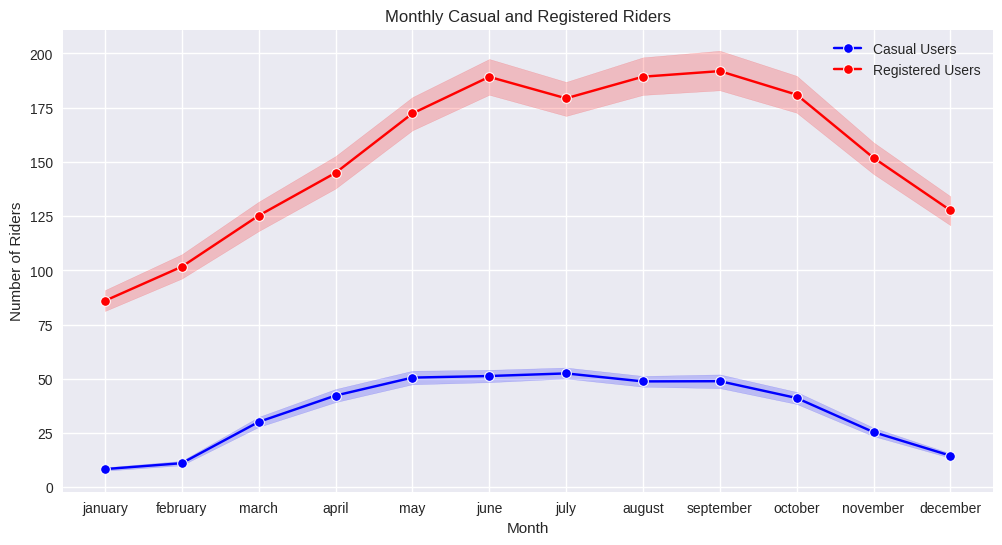

In [390]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='mnth', y='casual', marker='o', label='Casual Users', color='blue')
sns.lineplot(data=df_hour, x='mnth', y='registered', marker='o', label='Registered Users', color='red')
plt.title('Monthly Casual and Registered Riders')
plt.xlabel('Month')
plt.ylabel('Number of Riders')
plt.legend()
plt.show()

Text(0, 0.5, 'Number of Riders')

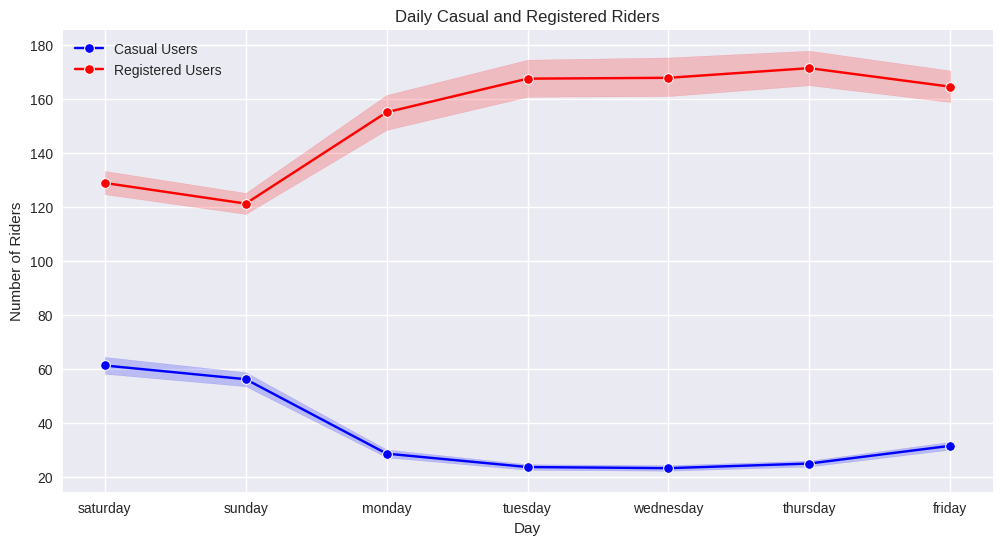

In [391]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='weekday', y='casual', marker='o', label='Casual Users', color='blue')
sns.lineplot(data=df_hour, x='weekday', y='registered', marker='o', label='Registered Users', color='red')
plt.title('Daily Casual and Registered Riders')
plt.xlabel('Day')
plt.ylabel('Number of Riders')

Text(0, 0.5, 'Number of Riders')

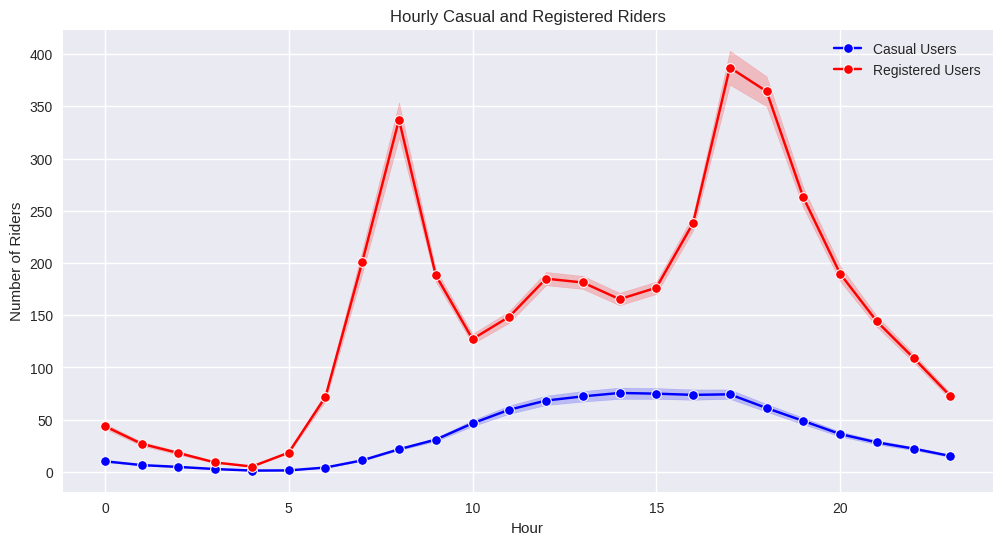

In [392]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='hr', y='casual', marker='o', label='Casual Users', color='blue')
sns.lineplot(data=df_hour, x='hr', y='registered', marker='o', label='Registered Users', color='red')
plt.title('Hourly Casual and Registered Riders')
plt.xlabel('Hour')
plt.ylabel('Number of Riders')

**Insight:**
- Pada bulan Juni sampai dengan September adalah pengguna terbanyak dalam menyewa sepeda.
- Pada akhir pekan / weekend, pengguna sepeda cenderung turun dibanding dengan hari kerja / weekdays.
- Penyewa sepeda mulai mengalami kenaikan pada pagi jam 5 sampai dengan pukul 10 karena ada hubungannya dengan orang berangkat bekerja dan akan mengalami kenaikan kembali di jam pulang kerja yaitu pukul 15 sampai dengan pukul 20.

### Pertanyaan 2:
- Bagaimana pola penggunaan sepeda bervariasi antar musim?
- Apakah variasi jumlah penyewaan sepeda lebih tinggi pada hari libur dibandingkan hari biasa?
- Bagaimana pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah penyewaan sepeda?

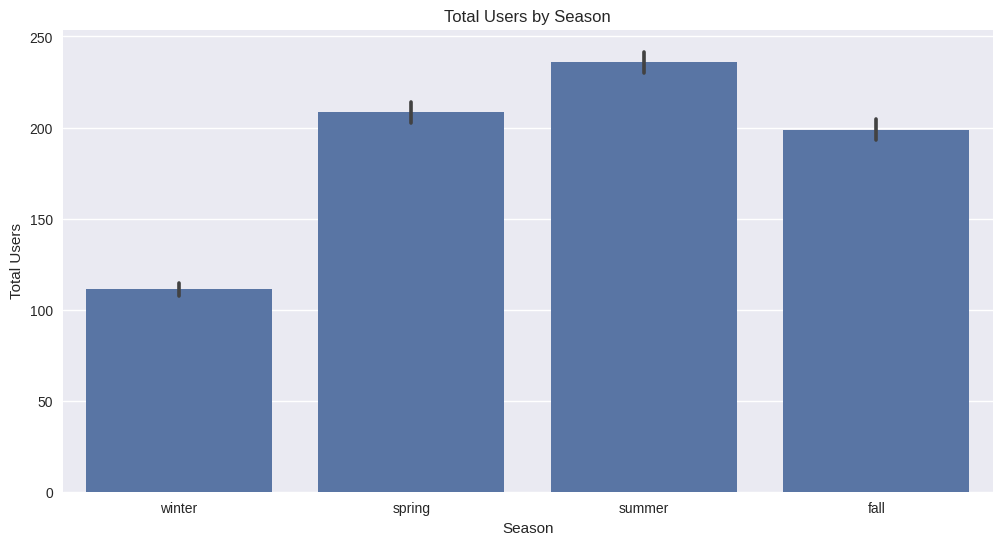

In [393]:
# Bar plot of total users by season
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hour, x='season', y='cnt')
plt.title('Total Users by Season')
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.show()

([<matplotlib.axis.XTick at 0x7d5db5f80dd0>,
 [Text(0, 0, 'Non-Holiday'), Text(1, 0, 'Holiday')])

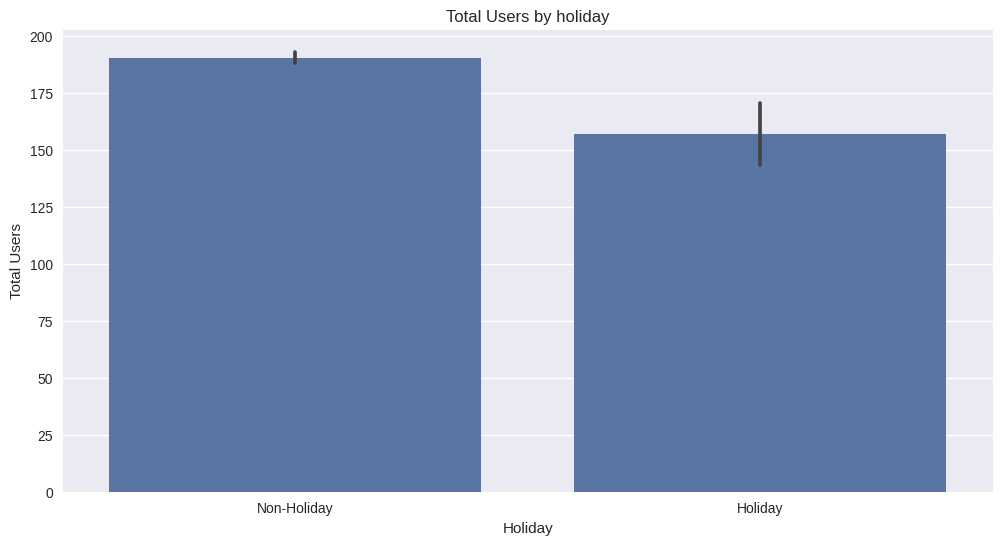

In [394]:
# Bar plot of total users by holiday and non holiday
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hour, x='holiday', y='cnt')
plt.title('Total Users by holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Users')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])

Text(0, 0.5, 'Total Users')

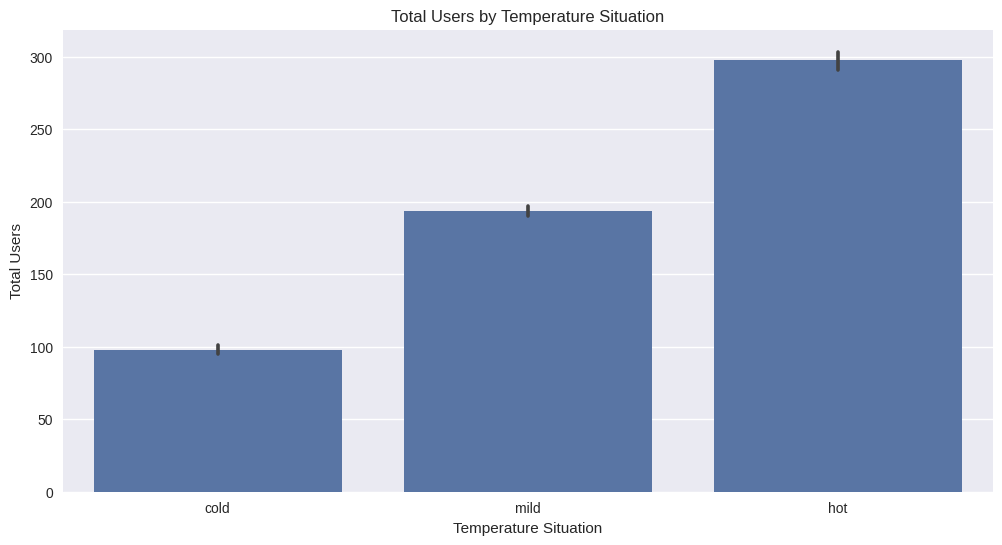

In [395]:
# Bar plot of total users by temperature situation
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hour, x='temp_binned', y='cnt')
plt.title('Total Users by Temperature Situation')
plt.xlabel('Temperature Situation')
plt.ylabel('Total Users')

Text(0, 0.5, 'Total Users')

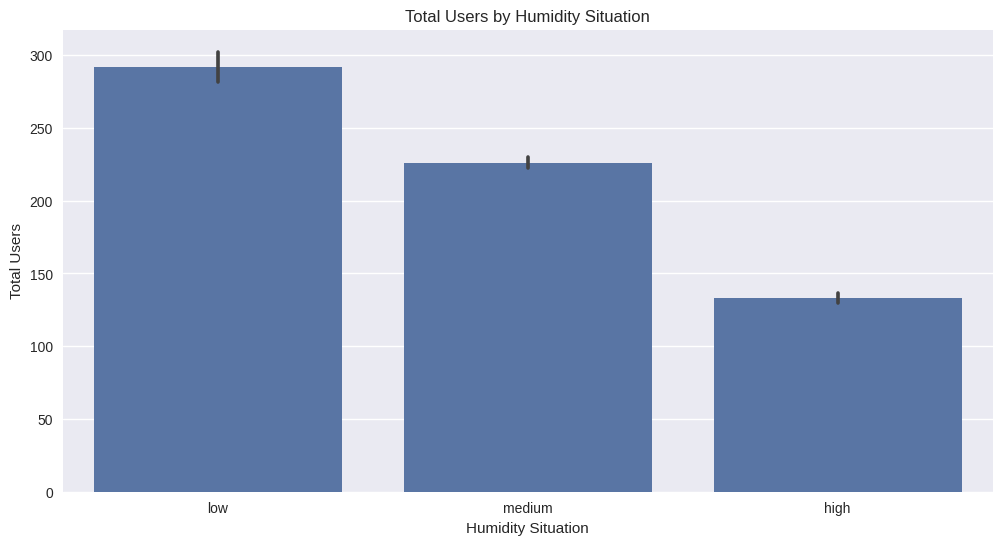

In [396]:
# Bar plot of total users by humidity situation
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hour, x='hum_binned', y='cnt')
plt.title('Total Users by Humidity Situation')
plt.xlabel('Humidity Situation')
plt.ylabel('Total Users')

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

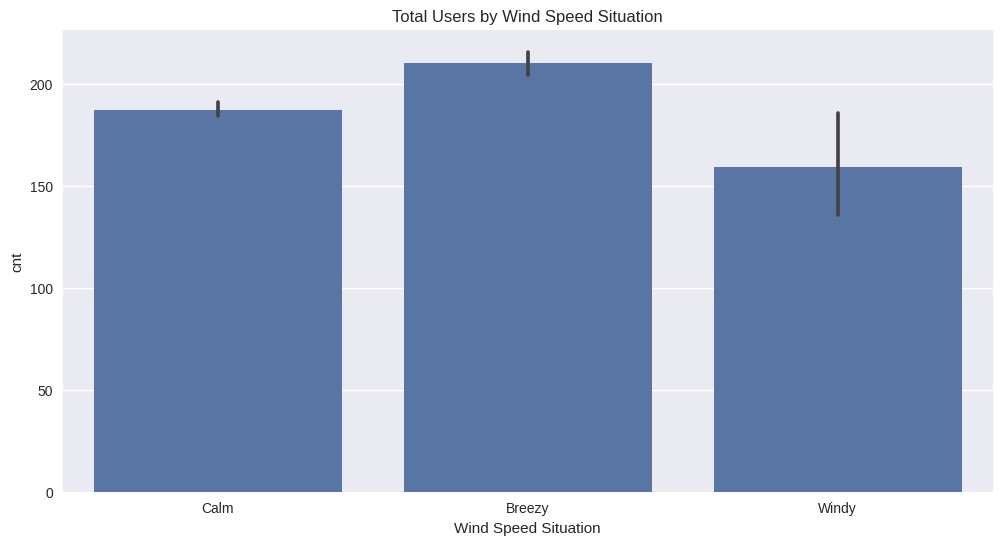

In [397]:
# Bar plot of total users by wind speed situation
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hour, x='wind_binned', y='cnt')
plt.title('Total Users by Wind Speed Situation')
plt.xlabel('Wind Speed Situation')
plt.ylabel

### Insight:
- Pola penyewaan / penggunaan sepeda paling tinggi ada di musim panas, dan terendah pada musim dingin.
- Pola penyewaan sepeda lebih tinggi pada hari biasa dibanding hari libur, bisa saja dikarenakan hari biasa banyak orang berangkat bekerja / beraktivitas menggunakan sepeda.
- Pada suhu yang panas, kelembapan yang rendah, dan angin yang sejuk banyak pengguna menggunakan sepeda. Sebaliknya, dalam kondisi suhu rendah, kelembapan tinggi, atau angin kencang, jumlah penyewaan cenderung lebih rendah."

## Conclusion

1. Pengaruh Faktor Cuaca terhadap Penyewaan Sepeda
- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, di mana penyewaan meningkat saat suhu lebih tinggi.
- Kelembapan tinggi cenderung mengurangi jumlah penyewaan sepeda.
2. Pengaruh Musim terhadap Permintaan Sepeda
- Penyewaan sepeda tertinggi terjadi pada musim panas dan musim gugur, sementara musim dingin memiliki jumlah penyewaan yang paling rendah.
- Pengguna terdaftar (registered) mendominasi penyewaan sepeda di semua musim dibandingkan pengguna kasual.
3. Perbedaan Pola Penyewaan antara Pengguna Casual dan Registered
- Pengguna terdaftar (registered) memiliki jumlah penyewaan yang lebih tinggi dibandingkan pengguna kasual.
- Pengguna kasual cenderung lebih banyak menyewa pada akhir pekan, sedangkan pengguna terdaftar lebih stabil dalam penyewaan sepanjang minggu.
4. Perbedaan Pola Penyewaan antara Hari Kerja dan Akhir Pekan
- Penyewaan pada hari kerja lebih banyak dilakukan oleh pengguna terdaftar, terutama pada jam sibuk (pagi dan sore).
- Pada akhir pekan, jumlah penyewaan oleh pengguna kasual meningkat secara signifikan dibanding dengan hari biasa.